In [1]:
import os

os.environ["SEED"] = "0"

import json
from pathlib import Path

import numpy as np
import pandas as pd

from src.constant import DATA_DIR, DATABASE_DIR
from src.database import DB
from src.instance.BBOB_Instance import BBOB_Instance, set_08_cut_off_time
from src.instance.InstanceList import InstanceList

pd.options.display.max_columns = None

In [2]:
len({
        "ela_distr.skewness": 0.0,
        "ela_distr.kurtosis": 0.0,
        "ela_distr.number_of_peaks": 0.0,
        "ela_distr.costs_runtime": 0.0,
        "ela_level.mmce_lda_10": 0.0,
        "ela_level.mmce_qda_10": 0.0,
        "ela_level.lda_qda_10": 0.0,
        "ela_level.mmce_lda_25": 0.0,
        "ela_level.mmce_qda_25": 0.0,
        "ela_level.lda_qda_25": 0.0,
        "ela_level.mmce_lda_50": 0.0,
        "ela_level.mmce_qda_50": 0.0,
        "ela_level.lda_qda_50": 0.0,
        "ela_level.costs_runtime": 0.0,
        "ela_meta.lin_simple.adj_r2": 0.0,
        "ela_meta.lin_simple.intercept": 0.0,
        "ela_meta.lin_simple.coef.min": 0.0,
        "ela_meta.lin_simple.coef.max": 0.0,
        "ela_meta.lin_simple.coef.max_by_min": 0.0,
        "ela_meta.lin_w_interact.adj_r2": 0.0,
        "ela_meta.quad_simple.adj_r2": 0.0,
        "ela_meta.quad_simple.cond": 0.0,
        "ela_meta.quad_w_interact.adj_r2": 0.0,
        "ela_meta.costs_runtime": 0.0,
        "disp.ratio_mean_02": 0.0,
        "disp.ratio_mean_05": 0.0,
        "disp.ratio_mean_10": 0.0,
        "disp.ratio_mean_25": 0.0,
        "disp.ratio_median_02": 0.0,
        "disp.ratio_median_05": 0.0,
        "disp.ratio_median_10": 0.0,
        "disp.ratio_median_25": 0.0,
        "disp.diff_mean_02": 0.0,
        "disp.diff_mean_05": 0.0,
        "disp.diff_mean_10": 0.0,
        "disp.diff_mean_25": 0.0,
        "disp.diff_median_02": 0.0,
        "disp.diff_median_05": 0.0,
        "disp.diff_median_10": 0.0,
        "disp.diff_median_25": 0.0,
        "disp.costs_runtime": 0.0,
        "nbc.nn_nb.sd_ratio": 0.0,
        "nbc.nn_nb.mean_ratio": 0.0,
        "nbc.nn_nb.cor": 0.0,
        "nbc.dist_ratio.coeff_var": 0.0,
        "nbc.nb_fitness.cor": 0.0,
        "nbc.costs_runtime": 0.0,
        "pca.expl_var.cov_x": 0.0,
        "pca.expl_var.cor_x": 0.0,
        "pca.expl_var.cov_init": 0.0,
        "pca.expl_var.cor_init": 0.0,
        "pca.expl_var_PC1.cov_x": 0.0,
        "pca.expl_var_PC1.cor_x": 0.0,
        "pca.expl_var_PC1.cov_init": 0.0,
        "pca.expl_var_PC1.cor_init": 0.0,
        "pca.costs_runtime": 0.0,
        "ic.h_max": 0.0,
        "ic.eps_s": 0.0,
        "ic.eps_max": 0.0,
        "ic.eps_ratio": 0.0,
        "ic.m0": 0.0,
        "ic.costs_runtime": 0.0,
    })

62

In [2]:
instance = BBOB_Instance(function_index=1, dimension=2, instance_index=1)

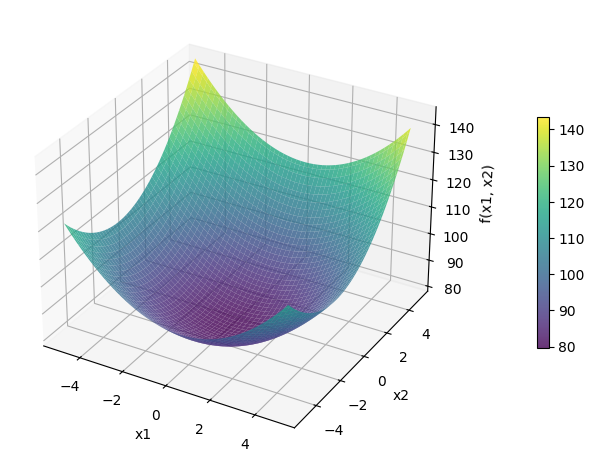

In [13]:
import matplotlib.pyplot as plt

x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
problem = instance.get_problem()

Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = [X[i, j], Y[i, j]]
        Z[i, j] = problem(point)

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
plt.colorbar(surf, ax=ax, shrink=0.5, pad=0.13)
plt.grid(color="black", alpha=0.05)
plt.savefig("bbob_f001_i01_d02.pdf", bbox_inches="tight")
plt.show()

In [ ]:
n = 25
seed = 0

rng = np.random.default_rng(seed=seed)
function_index_list = list(range(1, 25))
dimension_list = [2, 3, 5, 10, 20]
instance_index_list = [3, 4, 5]
n_per_dimension = n // len(dimension_list)
instance_list = InstanceList()

for dimension in dimension_list:
    sampled_pairs = rng.choice(
        len(function_index_list) * len(instance_index_list),
        size=n_per_dimension,
        replace=False
    )

    for idx in sampled_pairs:
        function_idx = function_index_list[idx // len(instance_index_list)]
        instance_idx = instance_index_list[idx % len(instance_index_list)]
        
        bbob_instance = BBOB_Instance(
            function_index=function_idx,
            dimension=dimension,
            instance_index=instance_idx
        )
        instance_list.append(bbob_instance)

instance_list

InstanceList(size=25)[BBOB_Instance(problem_id=bbob_f015_i04_d02), BBOB_Instance(problem_id=bbob_f012_i05_d02), BBOB_Instance(problem_id=bbob_f007_i04_d02), BBOB_Instance(problem_id=bbob_f008_i04_d02), BBOB_Instance(problem_id=bbob_f020_i03_d02), BBOB_Instance(problem_id=bbob_f019_i04_d03), BBOB_Instance(problem_id=bbob_f012_i05_d03), BBOB_Instance(problem_id=bbob_f015_i05_d03), BBOB_Instance(problem_id=bbob_f022_i03_d03), BBOB_Instance(problem_id=bbob_f015_i04_d03), BBOB_Instance(problem_id=bbob_f017_i03_d05), BBOB_Instance(problem_id=bbob_f020_i03_d05), BBOB_Instance(problem_id=bbob_f007_i04_d05), BBOB_Instance(problem_id=bbob_f022_i04_d05), BBOB_Instance(problem_id=bbob_f013_i05_d05), BBOB_Instance(problem_id=bbob_f018_i03_d10), BBOB_Instance(problem_id=bbob_f018_i04_d10), BBOB_Instance(problem_id=bbob_f005_i03_d10), BBOB_Instance(problem_id=bbob_f021_i03_d10), BBOB_Instance(problem_id=bbob_f001_i05_d10), BBOB_Instance(problem_id=bbob_f007_i05_d20), BBOB_Instance(problem_id=bbob_f01

In [ ]:
# features = {}

# for features_file in Path("features").glob("*.json"):
#     with open(features_file, "r") as f:
#         features = {
#             **features,
#             **json.load(f)
#         }

# len(features)

# with open(DATA_DIR / "BBOB" / "features.json", "w") as f:
#     json.dump(features, f, indent=4)

In [ ]:
# from src.instance.BBOB_Instance import BBOB_Instance
# import json

# features = {}

# for instance_index in [1, 2, 3, 4, 5]:
#     instance = BBOB_Instance(
#         function_index=7,
#         dimension=2,
#         instance_index=instance_index,
#     )
#     result, time = instance.calculate_features()
#     features[instance.id()] = {"result": result, "time": time}

# with open("features/features_7_2.json", "w") as f:
#     json.dump(features, f, indent=4)